Data Sources from [SV Miller Github: dragracer](https://github.com/svmiller/dragracer)

> Originally in R, I converted to csv using R Studio
> Sentiment Analysis on Judges Critiques, add as feature to the data, measure if it improves the model
> 


In [ ]:
import pandas as pd
#import wget
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
#read data
df_ep=  pd.read_csv('data/rpdr_ep.csv', encoding='latin1')
df_contep =  pd.read_csv('data/rpdr_contep.csv', encoding='latin1')
df_contestants =  pd.read_csv('data/rpdr_contestants.csv', encoding='latin1')

In [ ]:
#df_ep.info()

In [ ]:
#df_ep.head(10)

In [ ]:
#df_contep.info()

In [ ]:
#df_contep.head()

In [ ]:
#df_contep.sort_values('outcome', ascending=False)

In [ ]:
#df_contestants.info()

In [ ]:
#df_contestants.head()



---



---



In [ ]:
#preprocess the data
#1.standardize columns contestant names
#2.turn NA to 0 etc.

In [ ]:
df_contestants['contestant'] = df_contestants['contestant'].str.replace('[^a-zA-Z0-9\s]', '',regex=True).str.upper()

In [ ]:
#NA Handling: using -1 for previously eliminated contestants, NA = 0 in minichalw, NA = OUT
df_contep['contestant'] = df_contep['contestant'].str.replace('[^a-zA-Z0-9\s]', '',regex=True).str.upper()
df_contep['eliminated'].fillna(-1, inplace=True)
df_contep['minichalw'].fillna(0, inplace=True)
df_contep['outcome'].fillna('OUT', inplace = True)
df_contep.drop(columns = ['missc'],inplace=True)
df_contep

,Unnamed: 0,season,rank,contestant,episode,outcome,eliminated,participant,minichalw,finale,penultimate
0,1,S01,1.0,BEBE ZAHARA BENET,1,SAFE,0.0,1,0.0,0,0
1,2,S01,2.0,NINA FLOWERS,1,WIN,0.0,1,0.0,0,0
2,3,S01,3.0,REBECCA GLASSCOCK,1,LOW,0.0,1,0.0,0,0
3,4,S01,4.0,SHANNEL,1,SAFE,0.0,1,0.0,0,0
4,5,S01,5.0,ONGINA,1,HIGH,0.0,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2315,2316,S14,10.0,MADDY MORPHOSIS,16,OUT,-1.0,0,0.0,1,0
2316,2317,S14,11.0,ORION STORY,16,OUT,-1.0,0,0.0,1,0
2317,2318,S14,12.0,KORNBREAD THE SNACK JETE,16,OUT,-1.0,0,0.0,1,0
2318,2319,S14,13.0,ALYSSA HUNTER,16,OUT,-1.0,0,0.0,1,0


In [ ]:
#calculate the average rank for each contestant based on ['rank'] 
avg_rank = df_contep.groupby('contestant')['rank'].mean().reset_index()
avg_rank= avg_rank.rename(columns = {'rank':'avg_rank'})
avg_rank

,contestant,avg_rank
0,ACID BETTY,8.0
1,ADORE DELANO,2.0
2,AIDEN ZHANE,9.0
3,AJA,9.0
4,AKASHIA,7.0
...,...,...
175,WILLAM,7.0
176,WILLOW PILL,1.0
177,YARA SOFIA,4.0
178,YUHUA HAMASAKI,12.0


In [ ]:
avg_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   contestant  180 non-null    object 
 1   avg_rank    179 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [ ]:

#DO NOT USE
#normalize ['minichalw'] count for contestants by converting to percentage of mini challenge wins for the season

#sum minichallege wins by season
# mcw_by_season = df_contep.groupby('season').agg(total_mcw =('minichalw','sum'))
# mcw_by_season

#issue because S11-14 say no mini challenges//may be better calculating from the other dataset.


In [ ]:
#sum minichallenge wins by contestant (could be incorrect also) __DNU: DO NOT USE
#mcw_by_contestant = df_contep.groupby('contestant').agg(total_mcw=('minichalw','sum'))
#mcw_by_contestant.sort_values('total_mcw',ascending = False).head(20)

In [ ]:
#count ['outcomes'] catagories SAFE, WIN, LOW, HIGH, OUT, BTM ,maybe create a safe to win ratio feature

outcome_counts = df_contep.groupby(['contestant','outcome']).size().unstack(fill_value=0)
#outcome_counts.info()


<Axes: >

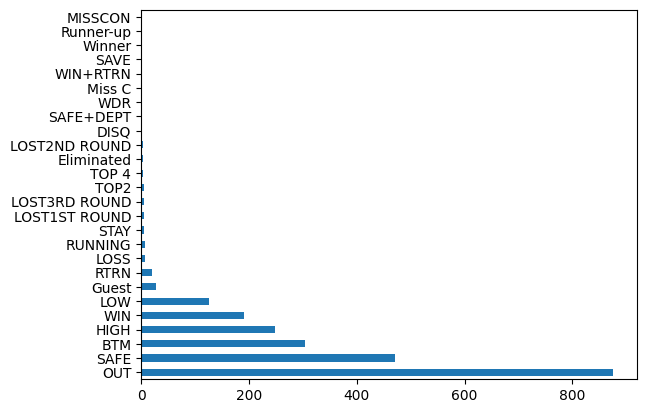

In [ ]:
#review label distribution
outcome_counts_view = df_contep['outcome'].value_counts()
outcome_counts_view.plot(kind='barh')
#plt.show()  #Labels: LOW,WIN,HIGH,BTM,SAFE,OUT

In [ ]:
outcome_label_counts = outcome_counts[['LOW','WIN','HIGH','BTM','SAFE','OUT']]
outcome_label_counts

outcome,LOW,WIN,HIGH,BTM,SAFE,OUT
contestant,,,,,,
ACID BETTY,0,0,3,1,1,5
ADORE DELANO,2,4,3,2,1,1
AIDEN ZHANE,1,0,2,1,1,9
AJA,0,0,0,2,5,5
AKASHIA,0,0,0,3,0,4
...,...,...,...,...,...,...
WILLAM,0,2,1,1,4,4
WILLOW PILL,0,1,0,2,9,1
YARA SOFIA,2,1,4,2,3,1




---



---

Episode Data:

In [ ]:
#minichal calculation from df_ep
#spotcheck: Season 01 = 4 mc
df_ep['minic'][:9]

0                                  NaN
1                     Act out emotions
2                                  NaN
3    30 Minutes to do partner's makeup
4         Exercise/endurance challenge
5               Vogue posing challenge
6                                  NaN
7                                  NaN
8                                  NaN
Name: minic, dtype: object

In [ ]:
#minichallenge count by season
mc_count = df_ep.groupby('season').agg(total_mc = ('minic','count')).reset_index()
mc_count

,season,total_mc
0,S01,4
1,S02,9
2,S03,12
3,S04,11
4,S05,11
5,S06,10
6,S07,9
7,S08,6
8,S09,2
9,S10,11


In [ ]:
mini_challenges = df_ep[['minicw1','minicw2','minicw3','minicw4']]
mini_challenges

,minicw1,minicw2,minicw3,minicw4
0,NaN,NaN,NaN,NaN
1,Ongina,Akashia,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Jade,NaN,NaN,NaN
4,Rebecca Glasscock,NaN,NaN,NaN
...,...,...,...,...
186,NaN,NaN,NaN,NaN
187,Bosco,Daya Betty,Lady Camden,Willow Pill
188,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN


In [ ]:
mini_chal = ['minicw1','minicw2','minicw3','minicw4']
mini_chal_winner_list = []

for chal in mini_chal:
  mini_chal_winner_list.extend(mini_challenges[chal].dropna().tolist())

print(len(mini_chal_winner_list)) #150

150


In [ ]:
mini_chal_winner_series = pd.Series(mini_chal_winner_list)
mini_chal_winner_series = mini_chal_winner_series.str.replace('[^a-zA-Z0-9\s]', '',regex=True).str.upper() #format contestant names

mc_win_df = pd.DataFrame(mini_chal_winner_series, columns=['contestant'])
mc_win_agg = mc_win_df.groupby('contestant').agg(total_mcwins = ('contestant','count')).reset_index()
mc_win_agg

,contestant,total_mcwins
0,ADORE DELANO,2
1,AKASHIA,1
2,AKERIA CHANEL DAVENPORT,1
3,ALASKA,4
4,ALEXIS MATEO,1
...,...,...
89,VANESSA VANJIE MATEO,1
90,VIOLET CHACHKI,1
91,WILLAM,3
92,WILLOW PILL,2


In [ ]:
final_df = pd.merge(df_contestants,outcome_label_counts, on='contestant')
final_df

,Unnamed: 0,season,contestant,age,dob,hometown,LOW,WIN,HIGH,BTM,SAFE,OUT
0,1,S01,BEBE ZAHARA BENET,28,1981-03-20,"Minneapolis, Minnesota",0,3,1,1,2,0
1,2,S01,NINA FLOWERS,34,1974-02-22,"Bayamón, Puerto Rico",1,1,4,0,1,0
2,3,S01,REBECCA GLASSCOCK,26,1983-05-25,"Fort Lauderdale, Florida",1,1,1,3,1,0
3,4,S01,SHANNEL,26,1979-07-03,"Las Vegas, Nevada",1,0,1,2,2,1
4,5,S01,ONGINA,26,1982-01-06,"Los Angeles, California",0,2,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
179,180,S14,MADDY MORPHOSIS,26,1994-09-02,"Fayetteville, Arkansas",0,0,0,2,3,9
180,181,S14,ORION STORY,25,1996-06-25,"Grand Rapids, Michigan",0,0,0,2,2,10
181,182,S14,KORNBREAD THE SNACK JETE,29,1992-01-14,"Los Angeles, California",0,1,0,0,2,10
182,183,S14,ALYSSA HUNTER,26,1995-02-19,"Catano, Puerto Rico",0,0,0,1,2,11


In [ ]:
final_df = pd.merge(final_df,mc_win_agg, on='contestant',how='outer').fillna(0) 
final_df

,Unnamed: 0,season,contestant,age,dob,hometown,LOW,WIN,HIGH,BTM,SAFE,OUT,total_mcwins
0,1.0,S01,BEBE ZAHARA BENET,28.0,1981-03-20,"Minneapolis, Minnesota",0.0,3.0,1.0,1.0,2.0,0.0,0.0
1,2.0,S01,NINA FLOWERS,34.0,1974-02-22,"Bayamón, Puerto Rico",1.0,1.0,4.0,0.0,1.0,0.0,1.0
2,3.0,S01,REBECCA GLASSCOCK,26.0,1983-05-25,"Fort Lauderdale, Florida",1.0,1.0,1.0,3.0,1.0,0.0,1.0
3,4.0,S01,SHANNEL,26.0,1979-07-03,"Las Vegas, Nevada",1.0,0.0,1.0,2.0,2.0,1.0,0.0
4,5.0,S01,ONGINA,26.0,1982-01-06,"Los Angeles, California",0.0,2.0,2.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,181.0,S14,ORION STORY,25.0,1996-06-25,"Grand Rapids, Michigan",0.0,0.0,0.0,2.0,2.0,10.0,0.0
181,182.0,S14,KORNBREAD THE SNACK JETE,29.0,1992-01-14,"Los Angeles, California",0.0,1.0,0.0,0.0,2.0,10.0,0.0
182,183.0,S14,ALYSSA HUNTER,26.0,1995-02-19,"Catano, Puerto Rico",0.0,0.0,0.0,1.0,2.0,11.0,0.0
183,184.0,S14,JUNE JAMBALAYA,29.0,0,"Los Angeles, California",0.0,0.0,0.0,2.0,0.0,12.0,0.0


In [ ]:
final_df = pd.merge(final_df,mc_count, on='season')
final_df

,Unnamed: 0,season,contestant,age,dob,hometown,LOW,WIN,HIGH,BTM,SAFE,OUT,total_mcwins,total_mc
0,1.0,S01,BEBE ZAHARA BENET,28.0,1981-03-20,"Minneapolis, Minnesota",0.0,3.0,1.0,1.0,2.0,0.0,0.0,4
1,2.0,S01,NINA FLOWERS,34.0,1974-02-22,"Bayamón, Puerto Rico",1.0,1.0,4.0,0.0,1.0,0.0,1.0,4
2,3.0,S01,REBECCA GLASSCOCK,26.0,1983-05-25,"Fort Lauderdale, Florida",1.0,1.0,1.0,3.0,1.0,0.0,1.0,4
3,4.0,S01,SHANNEL,26.0,1979-07-03,"Las Vegas, Nevada",1.0,0.0,1.0,2.0,2.0,1.0,0.0,4
4,5.0,S01,ONGINA,26.0,1982-01-06,"Los Angeles, California",0.0,2.0,2.0,1.0,0.0,2.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180.0,S14,MADDY MORPHOSIS,26.0,1994-09-02,"Fayetteville, Arkansas",0.0,0.0,0.0,2.0,3.0,9.0,0.0,6
180,181.0,S14,ORION STORY,25.0,1996-06-25,"Grand Rapids, Michigan",0.0,0.0,0.0,2.0,2.0,10.0,0.0,6
181,182.0,S14,KORNBREAD THE SNACK JETE,29.0,1992-01-14,"Los Angeles, California",0.0,1.0,0.0,0.0,2.0,10.0,0.0,6
182,183.0,S14,ALYSSA HUNTER,26.0,1995-02-19,"Catano, Puerto Rico",0.0,0.0,0.0,1.0,2.0,11.0,0.0,6


In [ ]:
final_df = pd.merge(final_df,avg_rank,on='contestant')
final_df

,Unnamed: 0,season,contestant,age,dob,hometown,LOW,WIN,HIGH,BTM,SAFE,OUT,total_mcwins,total_mc,avg_rank
0,1.0,S01,BEBE ZAHARA BENET,28.0,1981-03-20,"Minneapolis, Minnesota",0.0,3.0,1.0,1.0,2.0,0.0,0.0,4,1.0
1,2.0,S01,NINA FLOWERS,34.0,1974-02-22,"Bayamón, Puerto Rico",1.0,1.0,4.0,0.0,1.0,0.0,1.0,4,2.0
2,3.0,S01,REBECCA GLASSCOCK,26.0,1983-05-25,"Fort Lauderdale, Florida",1.0,1.0,1.0,3.0,1.0,0.0,1.0,4,3.0
3,4.0,S01,SHANNEL,26.0,1979-07-03,"Las Vegas, Nevada",1.0,0.0,1.0,2.0,2.0,1.0,0.0,4,4.0
4,5.0,S01,ONGINA,26.0,1982-01-06,"Los Angeles, California",0.0,2.0,2.0,1.0,0.0,2.0,1.0,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180.0,S14,MADDY MORPHOSIS,26.0,1994-09-02,"Fayetteville, Arkansas",0.0,0.0,0.0,2.0,3.0,9.0,0.0,6,10.0
180,181.0,S14,ORION STORY,25.0,1996-06-25,"Grand Rapids, Michigan",0.0,0.0,0.0,2.0,2.0,10.0,0.0,6,11.0
181,182.0,S14,KORNBREAD THE SNACK JETE,29.0,1992-01-14,"Los Angeles, California",0.0,1.0,0.0,0.0,2.0,10.0,0.0,6,12.0
182,183.0,S14,ALYSSA HUNTER,26.0,1995-02-19,"Catano, Puerto Rico",0.0,0.0,0.0,1.0,2.0,11.0,0.0,6,13.0


In [ ]:
#final_final_df.info() 
final_final_df= final_df.drop(final_df.columns[0], axis=1)
final_final_df['season_winner'] = 0
final_final_df

,season,contestant,age,dob,hometown,LOW,WIN,HIGH,BTM,SAFE,OUT,total_mcwins,total_mc,avg_rank,season_winner
0,S01,BEBE ZAHARA BENET,28.0,1981-03-20,"Minneapolis, Minnesota",0.0,3.0,1.0,1.0,2.0,0.0,0.0,4,1.0,0
1,S01,NINA FLOWERS,34.0,1974-02-22,"Bayamón, Puerto Rico",1.0,1.0,4.0,0.0,1.0,0.0,1.0,4,2.0,0
2,S01,REBECCA GLASSCOCK,26.0,1983-05-25,"Fort Lauderdale, Florida",1.0,1.0,1.0,3.0,1.0,0.0,1.0,4,3.0,0
3,S01,SHANNEL,26.0,1979-07-03,"Las Vegas, Nevada",1.0,0.0,1.0,2.0,2.0,1.0,0.0,4,4.0,0
4,S01,ONGINA,26.0,1982-01-06,"Los Angeles, California",0.0,2.0,2.0,1.0,0.0,2.0,1.0,4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,S14,MADDY MORPHOSIS,26.0,1994-09-02,"Fayetteville, Arkansas",0.0,0.0,0.0,2.0,3.0,9.0,0.0,6,10.0,0
180,S14,ORION STORY,25.0,1996-06-25,"Grand Rapids, Michigan",0.0,0.0,0.0,2.0,2.0,10.0,0.0,6,11.0,0
181,S14,KORNBREAD THE SNACK JETE,29.0,1992-01-14,"Los Angeles, California",0.0,1.0,0.0,0.0,2.0,10.0,0.0,6,12.0,0
182,S14,ALYSSA HUNTER,26.0,1995-02-19,"Catano, Puerto Rico",0.0,0.0,0.0,1.0,2.0,11.0,0.0,6,13.0,0


In [ ]:
final_final_df.to_csv('rpdr_data_final.csv', index = False)

Manually adjusted season winner column to reflect winners. Data Source: [DragRace Wiki](https://rupaulsdragrace.fandom.com/wiki/Winner_Reigns)